# Trend

## 1. Trend in Time Series

- A trend is a long-term increase or decrease in the level of the time series.
- Identifying and understanding trend information can aid in improving model performance; below are a few reasons

    1) Faster modeling
    
    2) Simpler problem
    
    3) More data

# 2. Detrend by differencing

Perhaps the simplest method to detrend a time series is by differencing. Specifically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

- value(t) = observation(t) − observation(t − 1)

In [14]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('sales-of-shampoo-over-a-three-ye.csv')

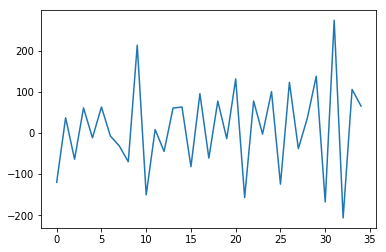

In [15]:
X = series['Sales of shampoo over a three year period'].values
diff = list()

for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
    
pyplot.plot(diff)
pyplot.show()

This approach works well for data with a linear trend. If the trend is quadratic (the change in the trend also increases or decreases), then a difference of the already-differenced dataset can be taken, a second level of differencing.

# 3. Detrend by model fitting

In [16]:
import numpy as np

In [17]:
from sklearn.linear_model import LinearRegression

In [30]:
X = [i for i in range(0, len(series))]
X = np.reshape(np.array(X[:-1]), (len(X) - 1, 1))
y = series['Sales of shampoo over a three year period'].values
y = y[:-1]

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

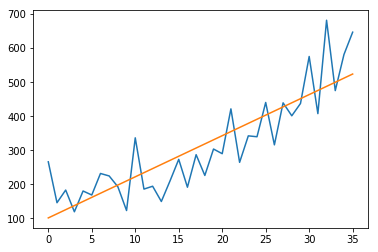

In [31]:
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()

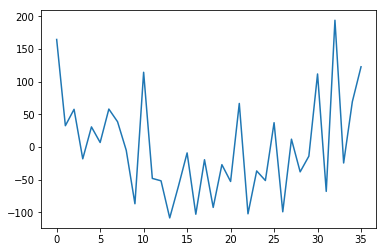

In [33]:
detrended = [y[i]-trend[i] for i in range(0, len(y))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()